In [1]:
import math
import numpy as np
import pandas as pd
import itertools
from Pricing.SABR import SABR_model
from Pricing.black_pricing import BSPricer_SABR
from Pricing.pdf_calculation import numerical_pdf
from Pricing.cdf_calculation import numerical_cdf
from matplotlib import pyplot as plt
from Pricing.arbitrage_check import arbitrage_check

In [31]:
F=[0.02,0.02]
vol=0.4
beta=0.9
rho=0
nu=0.5
alpha = 0.4 * math.pow(F[0],(1-beta))
expiry=np.array([5,20])
spread = np.arange(0.0001,0.1,0.01)
K = [[0 for y in range(len(spread))] for x in range(len(F))]

for i in range(len(F)):
    for j in range(len(spread)):
        K[i][j]=F[i]+spread[j]        
K=np.array(K)

In [32]:
ivol = []
sabr=SABR_model(beta,rho,nu)
vols = sabr.ivol_matrix_validation(alpha,F,K,expiry,method='Hagan_ln')
print('Lognormal implied vols using Lognormal Hagan:')
vols

Lognormal implied vols using Lognormal Hagan:


,0,1,2,3,4,5,6,7,8,9
0,0.441693,0.451117,0.474697,0.498401,0.519737,0.538596,0.555303,0.570215,0.583635,0.595809
1,0.567062,0.579146,0.609409,0.639830,0.667215,0.691418,0.712861,0.731998,0.749222,0.764847


In [33]:
h=0.001
bs=BSPricer_SABR(beta,rho,nu)
price=bs.BS_matrix(alpha,F,K,expiry,1,0,'Hagan_ln')
price_plus=bs.BS_matrix(alpha,F,K+h,expiry,1,0,'Hagan_ln')
print('price:')
print(price)
print('price_plus:')
print(price_plus)

price:
[[ 0.00754046  0.00532598  0.00428461  0.00370788  0.0033432   0.00309064
   0.00290425  0.00276022  0.00264501  0.00255035]
 [ 0.01589374  0.01524404  0.01520008  0.01532912  0.01549963  0.01567224
   0.01583502  0.01598492  0.01612192  0.01624699]]
price_plus:
[[ 0.00722811  0.00518671  0.00421226  0.0036642   0.00331393  0.00306953
   0.00288822  0.00274757  0.00263473  0.00254179]
 [ 0.01577766  0.01522352  0.01520868  0.01534534  0.01551711  0.01568905
   0.01585061  0.01599919  0.01613494  0.01625889]]


In [34]:
(price_plus-price)/h

array([[-0.31234265, -0.1392624 , -0.07235615, -0.04367329, -0.02927846,
        -0.02110677, -0.01602785, -0.01265044, -0.0102852 , -0.00856005],
       [-0.11607597, -0.02052135,  0.00860369,  0.01621314,  0.01748229,
         0.01681088,  0.0155837 ,  0.01426837,  0.01302407,  0.0118987 ]])

In [35]:
cdf=numerical_cdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.001,'Hagan_ln')
cdf

array([[-0.31234265, -0.1392624 , -0.07235615, -0.04367329, -0.02927846,
        -0.02110677, -0.01602785, -0.01265044, -0.0102852 , -0.00856005],
       [-0.11607597, -0.02052135,  0.00860369,  0.01621314,  0.01748229,
         0.01681088,  0.0155837 ,  0.01426837,  0.01302407,  0.0118987 ]])

In [36]:
arb=arbitrage_check(beta,rho,nu)
arb.arbitrage(alpha,F,K,expiry,1,0,0.001,'Hagan_ln')

SABR volatility method: Hagan_ln
Expiry= 5 Strike price= 0.0201 c.d.f= -0.312342654659 p.d.f= 26.7871926843 No
Expiry= 5 Strike price= 0.0301 c.d.f= -0.139262399624 p.d.f= 10.8666516131 No
Expiry= 5 Strike price= 0.0401 c.d.f= -0.0723561486734 p.d.f= 4.31693610123 No
Expiry= 5 Strike price= 0.0501 c.d.f= -0.0436732911501 p.d.f= 2.01477869879 No
Expiry= 5 Strike price= 0.0601 c.d.f= -0.029278464255 p.d.f= 1.08218538706 No
Expiry= 5 Strike price= 0.0701 c.d.f= -0.0211067709482 p.d.f= 0.645297084674 No
Expiry= 5 Strike price= 0.0801 c.d.f= -0.0160278517336 p.d.f= 0.415761871108 No
Expiry= 5 Strike price= 0.0901 c.d.f= -0.0126504395183 p.d.f= 0.284064954072 No
Expiry= 5 Strike price= 0.1001 c.d.f= -0.0102852013718 p.d.f= 0.203148124917 No
Expiry= 5 Strike price= 0.1101 c.d.f= -0.00856005077618 p.d.f= 0.150657619494 No
Expiry= 20 Strike price= 0.0201 c.d.f= -0.116075970373 p.d.f= 15.153329676 No
Expiry= 20 Strike price= 0.0301 c.d.f= -0.0205213520061 p.d.f= 5.49200049972 No
Expiry= 20 Strik

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

In [37]:
pdf=numerical_pdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.001,'Hagan_ln')
cdf=numerical_cdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.001,'Hagan_ln')

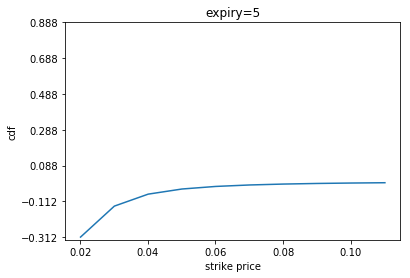

In [38]:
plt.plot(K[0],cdf[0])
plt.xlabel('strike price')
plt.ylabel('cdf')
plt.title('expiry=5')
plt.yticks(np.arange(min(cdf[0]), max(cdf[0])+1, 0.2))
plt.show()

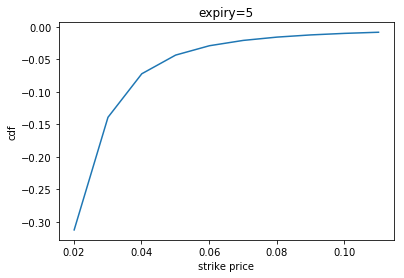

In [39]:
plt.plot(K[0],cdf[0])
plt.xlabel('strike price')
plt.ylabel('cdf')
plt.title('expiry=5')
#plt.yticks(np.arange(min(cdf[0]), max(cdf[0])+1, 0.2))
plt.show()

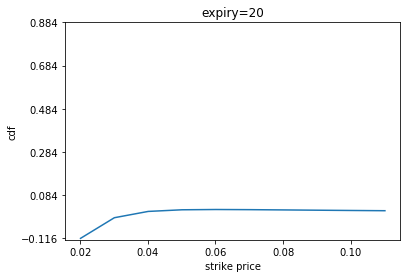

In [40]:
plt.plot(K[1],cdf[1])
plt.xlabel('strike price')
plt.ylabel('cdf')
plt.title('expiry=20')
plt.yticks(np.arange(min(cdf[1]), max(cdf[1])+1, 0.2))
plt.show()

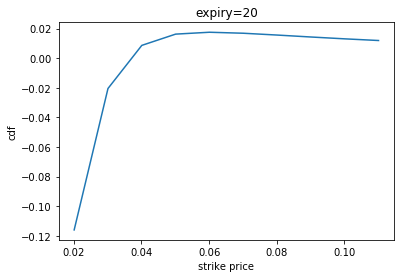

In [41]:
plt.plot(K[1],cdf[1])
plt.xlabel('strike price')
plt.ylabel('cdf')
plt.title('expiry=20')
#plt.yticks(np.arange(min(cdf[1]), max(cdf[1])+1, 0.2))
plt.show()

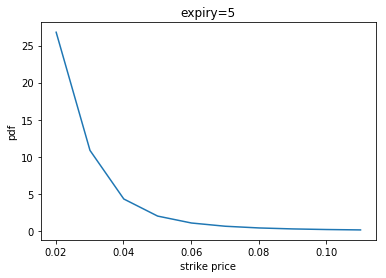

In [42]:
plt.plot(K[0],pdf[0])
plt.xlabel('strike price')
plt.ylabel('pdf')
plt.title('expiry=5')
#plt.yticks(np.arange(min(pdf[0]), max(pdf[0])+1, 0.2))
plt.show()

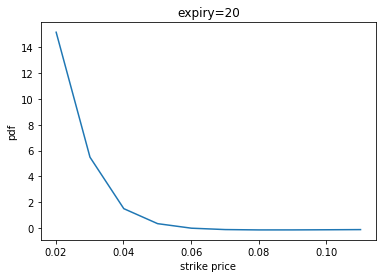

In [43]:
plt.plot(K[1],pdf[1])
plt.xlabel('strike price')
plt.ylabel('pdf')
plt.title('expiry=20')
#plt.yticks(np.arange(min(cdf[1]), max(cdf[1])+1, 0.2))
plt.show()